# **Convolutional Neural Networks (Advanced Building Blocks)**

Apart from convolutions, advanced CNN architecture are composed of different types of building blocks. In the following, we illustrate the most standard ones already implemented as Modules in PyTorch.

## Activation Functions

Different types of activation functions applied to all the elements in a given tensor

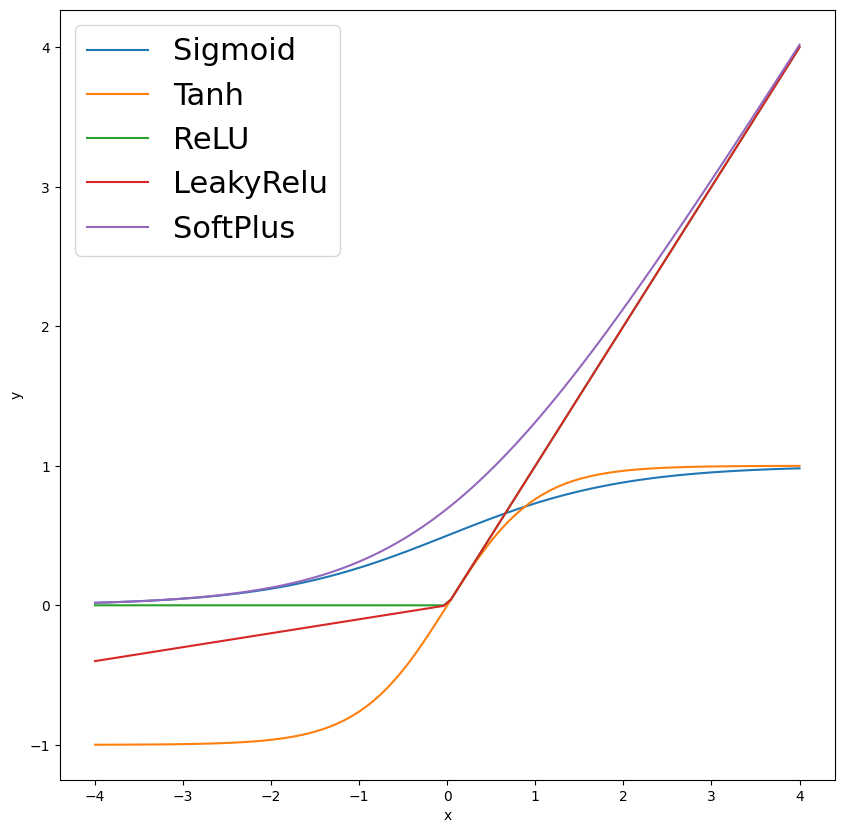

In [ ]:
# Initialize and apply different activation functions implemented in PyTorch
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

x = torch.from_numpy( np.linspace(-4,4,100))
plt.figure(figsize=(10,10))

# Sigmoid -> 1 / (1+exp(-x)) -> [0,1]
act = nn.Sigmoid()
y = act(x)
plt.plot(x.numpy(),y.numpy(),label='Sigmoid')

# Tanh -> Hyperbolic Tangent -> [-1,1]
act = nn.Tanh()
y = act(x)
plt.plot(x.numpy(),y.numpy(),label='Tanh')

# ReLU -> max(0,x)  -> [0,Inf]
act = nn.ReLU()
y = act(x)
plt.plot(x.numpy(),y.numpy(),label='ReLU')

# LeakyRelu - max(x*neg_slope,x)  -> [-Inf,Inf]
act = nn.LeakyReLU(negative_slope=0.1)
y = act(x)
plt.plot(x.numpy(),y.numpy(),label='LeakyRelu')

# SoftPlus -> log(1+exp(x)) -> [0,Inf]
act = nn.Softplus()
y = act(x)
plt.plot(x.numpy(),y.numpy(),label='SoftPlus')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(fontsize=22)

## Normalization Layers

Different types of normalization layers ( InstanceNorm and BatchNorm). Both layers normalize the tensor channels to have zero mean and unit standard deviation as:

$y = \frac{x - \mathrm{E}[x]}{ \sqrt{\mathrm{Var}[x] + \epsilon}} * \gamma + \beta$,

where, $\beta,\gamma$ are learnable paramters.

They differ on how the expectation and std. deviation are computed. In InstanceNorm, they are computed independently for each channel and sample. In contrast, BatchNorm computes the expectation and std. dev. of each channel but across all the samples. Additionally, BatchNorm stores the expectation and std. dev. during training in order to use it in testing.



In [ ]:
import torch
import torch.nn as nn
# Normlization Layers examples
num_channels = 2
num_samples = 4
x = torch.randn(num_samples,num_channels,5,5) # two 5x5 tensors with 2 channels

# Layer Normalization modules
instance_norm = nn.InstanceNorm2d(num_channels)
batch_norm = nn.BatchNorm2d(num_channels)

# Apply Instance Normalization
inst_norm_y = instance_norm(x)
inst_norm_y = inst_norm_y.view(num_samples,num_channels,-1)
print('-- Instance Normalization --')
print('Mean of samples and channels:')
print(inst_norm_y.mean(axis=2).squeeze().numpy())
print('Std. dev. of samples and channels:')

print(inst_norm_y.std(axis=2).squeeze().numpy())
batch_norm_y = batch_norm(x)
batch_norm_y = batch_norm_y.permute(1,0,2,3).reshape(num_channels,-1)

print('\n -- Batch Normalization -- ')
print('Channel mean accross samples:')
print(batch_norm_y.mean(axis=1).squeeze().detach().numpy())
print('Channel std. dev. accross samples:')
print(batch_norm_y.std(axis=1).squeeze().detach().numpy())


-- Instance Normalization --
Mean of samples and channels:
[[ 2.8610229e-08  4.7683715e-09]
 [ 0.0000000e+00 -2.3841857e-09]
 [ 0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00 -4.7683715e-09]]
Std. dev. of samples and channels:
[[1.0206151 1.0206159]
 [1.0206149 1.0206112]
 [1.0206153 1.0206145]
 [1.0206165 1.0206128]]

 -- Batch Normalization -- 
Channel mean accross samples:
[-2.3841857e-09 -4.7683715e-09]
Channel std. dev. accross samples:
[1.0050328 1.0050317]


## Pooling Layers

Different types of spatial pooling operators. They are used to decrease the spatial resolution of tensors and, thus, increase the receptive field of subsequent layers.

Original Tensor Size: torch.Size([3, 16, 16])
Resulting Tensor Size: torch.Size([3, 8, 8])


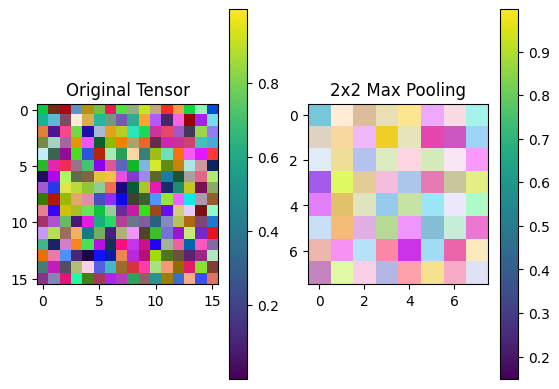

Original Tensor Size: torch.Size([3, 16, 16])
Resulting Tensor Size: torch.Size([3, 4, 4])


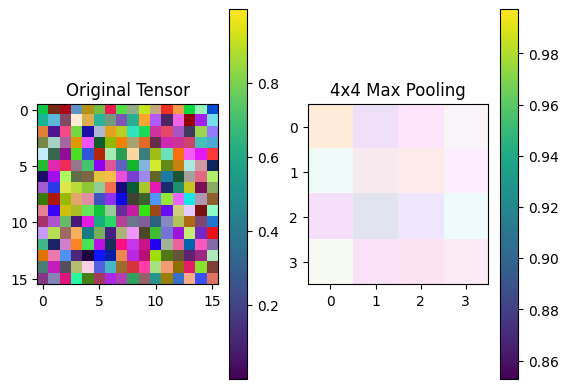

Original Tensor Size: torch.Size([3, 16, 16])
Resulting Tensor Size: torch.Size([3, 8, 8])


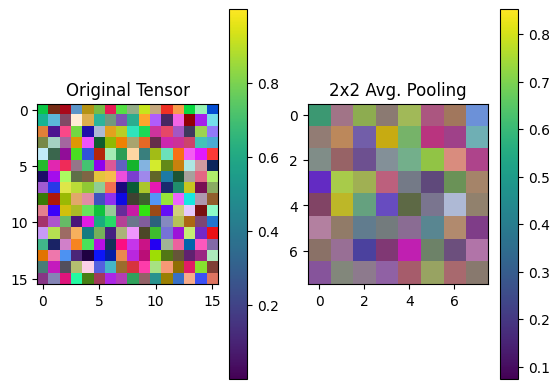

Original Tensor Size: torch.Size([3, 16, 16])
Resulting Tensor Size: torch.Size([3, 8, 8])


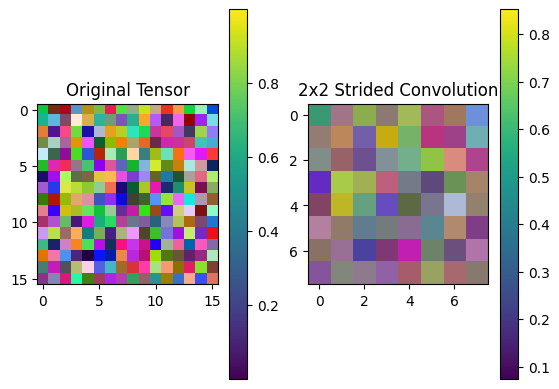

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# random image
x = torch.rand(3,16,16)

### MAX POOOLING ( Take the maximum of a window centered in each pixel - It is applied for each channel independently
###                Distance between windows is defined by stride

# Apply 2x2 Max Pooling (Divide spatial resolution by two)
window_size = 2
distance_btw_windows = 2
pooling = nn.MaxPool2d(kernel_size=window_size, stride=distance_btw_windows)
y = pooling(x)

print('Original Tensor Size: ' + str(x.shape))
print('Resulting Tensor Size: ' + str(y.shape))
plt.subplot(121)
plt.imshow(x.permute(1,2,0).numpy())
plt.colorbar()
plt.title('Original Tensor')

plt.subplot(122)
plt.imshow(y.permute(1,2,0).numpy())
plt.colorbar()
plt.title('2x2 Max Pooling')
plt.show()

# Apply 4x4 Max Pooling (Divide spatial resolution by 4)
window_size = 4
distance_btw_windows = 4
pooling = nn.MaxPool2d(kernel_size=window_size, stride=distance_btw_windows)
y = pooling(x)

print('Original Tensor Size: ' + str(x.shape))
print('Resulting Tensor Size: ' + str(y.shape))
plt.subplot(121)
plt.imshow(x.permute(1,2,0).numpy())
plt.colorbar()
plt.title('Original Tensor')

plt.subplot(122)
plt.imshow(y.permute(1,2,0).numpy())
plt.colorbar()
plt.title('4x4 Max Pooling')
plt.show()


### Average POOOLING ( Take the average of a window centered in each pixel. It is applied for each channel independently
###                Distance between windows is defined by stride)

# Apply 2x2 Average. Pooling (Divide spatial resolution by two)
window_size = 2
distance_btw_windows = 2
pooling = nn.AvgPool2d(kernel_size=window_size, stride=distance_btw_windows)
y = pooling(x)

print('Original Tensor Size: ' + str(x.shape))
print('Resulting Tensor Size: ' + str(y.shape))
plt.subplot(121)
plt.imshow(x.permute(1,2,0).numpy())
plt.colorbar()
plt.title('Original Tensor')

plt.subplot(122)
plt.imshow(y.permute(1,2,0).numpy())
plt.colorbar()
plt.title('2x2 Avg. Pooling')
plt.show()

### Strided Convolution ( Spatial Reoslution can also be reduced by using strided convolutions. In this case, the
                          # convolution will not be applied to all spatial locations but every n pixels (defined by stride paramter)

# Reduce spatial resolution by two with strided convolution
stride = 2
conv_pool = nn.Conv2d(3,3,3,stride=stride)

y = pooling(x)

print('Original Tensor Size: ' + str(x.shape))
print('Resulting Tensor Size: ' + str(y.shape))
plt.subplot(121)
plt.imshow(x.permute(1,2,0).numpy())
plt.colorbar()
plt.title('Original Tensor')

plt.subplot(122)
plt.imshow(y.permute(1,2,0).numpy())
plt.colorbar()
plt.title('2x2 Strided Convolution')
plt.show()

# **Convolutional Neural Networks (Advanced Architectures)**
In the following, we illustrate the key ideas behind popular Convolutional Neural Architectures.

## 1 VGG Network : https://arxiv.org/pdf/1409.1556.pdf.
Key idea : just go bigger and deeper

In [ ]:
class VGGSim(nn.Module):
    def __init__(self, num_classes=10):

        super(VGGSim, self).__init__()

        self.conv11 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.conv12 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)

        self.conv21 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv22 = nn.Conv2d(128,128, kernel_size=3, stride=1, padding=1)

        self.fc = nn.Linear(8*8*128, num_classes)

        self.maxpool= nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu = nn.ReLU()

    def forward(self, x):

        out = self.relu(self.conv11(x))
        out = self.relu(self.conv12(out))
        out = self.maxpool(out)

        out = self.relu(self.conv21(out))
        out = self.relu(self.conv22(out))
        out = self.maxpool(out)

        #print(out.shape)
        out = out.view(out.size(0), -1)
        out = self.fc(out)

        return out



## 2 Inception https://arxiv.org/abs/1409.4842
Key idea : Network in Network to learn multiple resolution features (parallel convolutions with different kernel sizes whose result is combined)

In [ ]:
class IncSim(nn.Module):
    def __init__(self, num_classes=10):

        super(IncSim, self).__init__()

        self.conv11 = nn.Conv2d(3, 64, kernel_size=1, stride=2, padding=0)
        self.conv12 = nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1)
        self.conv13 = nn.Conv2d(3, 64, kernel_size=5, stride=2, padding=2)

        self.conv21 = nn.Conv2d(192, 128, kernel_size=1, stride=2, padding=0)
        self.conv22 = nn.Conv2d(192, 128, kernel_size=3, stride=2, padding=1)
        self.conv23 = nn.Conv2d(192, 128, kernel_size=5, stride=2, padding=2)

        self.fc = nn.Linear(8*8*384, num_classes)

        self.relu = nn.ReLU()

    def forward(self, x):

        #Inc 1
        out11 = self.relu(self.conv11(x))
        out12 = self.relu(self.conv12(x))
        out13 = self.relu(self.conv13(x))

        out1a = [out11, out12, out13]
        out1a = torch.cat(out1a,dim=1)

        #Inc 12
        out21 = self.relu(self.conv21(out1a))
        out22 = self.relu(self.conv22(out1a))
        out23 = self.relu(self.conv23(out1a))

        out2a = [out21, out22, out23]
        out2a = torch.cat(out2a,1)

        out = out2a.view(out2a.size(0), -1)
        out = self.fc(out)

        return out

##3  Resnet :https://arxiv.org/abs/1512.03385
Key idea : Adding skip connection to let gradient flow directly to previous input.

In [ ]:
#use torch to make standard cnn
class ResSim(nn.Module):
    def __init__(self, num_classes=10):

        super(ResSim, self).__init__()

        self.conv11 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.conv12 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)

        self.conv21 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.conv22 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)

        self.fc = nn.Linear(8*8*64, num_classes)

        self.maxpool= nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu = nn.ReLU()

    def forward(self, x):

        out11 = self.relu(self.conv11(x))
        out12 = self.relu(self.conv12(out11)) + out11 # Residual connection 1

        out = self.maxpool(out12)

        out21 = self.relu(self.conv21(out))
        out = self.relu(self.conv22(out21)) + out21 # Residual connection 2
        out = self.maxpool(out)

        #print(out.shape)
        out = out.view(out.size(0), -1)
        out = self.fc(out)

        return out



# **Training and testing advanced architectures on SVHN**
We are going to test/train the previous advanced architectures on the SVHN dataset.

## SVHN Dataset and DataLoader

In [ ]:
## Create SVHN database

# All the data will be loaded from the provided file in Data/mnist.t
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as tf
import matplotlib.pyplot as plt
from PIL import Image
import scipy.io as sio
from google.colab import drive
import numpy as np

# Mount Google Drive
drive.mount('/content/drive')
data_path = '/content/drive/My Drive/DeepLearning_2024/P3/Data/'
results_path = '/content/drive/My Drive/DeepLearning_2024/P3/Results/'

#Making native class loader
class SVHN(torch.utils.data.Dataset):
    # Initialization method for the dataset
    def __init__(self,dataDir = data_path+'/svhn/train_32x32.mat',transform = None):
        mat_loaded = sio.loadmat(dataDir)
        self.data = mat_loaded['X']
        self.labels = mat_loaded['y'].squeeze()
        self.labels -= self.labels.min()
        self.transform = transform
     # What to do to load a single item in the dataset ( read image and label)
    def __getitem__(self, index):
        data = self.data[:,:,:,index]
        lbl = self.labels[index]

        data = Image.fromarray(data)
        # Apply a trasnformaiton to the image if it is indicated in the initalizer
        if self.transform is not None :
            data = self.transform(data)

        # return the image and the label
        return data,lbl

        pass

    # Return the number of images
    def __len__(self):
        return self.data.shape[3]

# Create train data loader
tr = tf.Compose([
        tf.ToTensor(),
        tf.Normalize(mean = [.5], std = [.5])
        ])
SVHNTrain = SVHN(data_path+'/svhn/train_32x32.mat',tr)
train_loader = torch.utils.data.DataLoader(dataset=SVHNTrain,
                                               batch_size=256,
                                               shuffle=True)

Mounted at /content/drive


## Define Train and Test Functions

In [ ]:
# Train function
def train(CNN, train_loader, optimizer, num_epochs=5, model_name='model.ckpt', device='cpu'):
    CNN.train() # Set the model in train mode
    total_step = len(train_loader)
    losses_list = []
    criterion = nn.CrossEntropyLoss()
    # Iterate over epochs
    for epoch in range(num_epochs):
        # Iterate the dataset
        loss_avg = 0
        nBatches = 0
        for i, (images, labels) in enumerate(train_loader):
            # Get batch of samples and labels
            images = images.to(device)
            labels = labels.type(torch.LongTensor).to(device)

            # Forward pass
            outputs = CNN(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_avg += loss.cpu().item()
            nBatches+=1
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                       .format(epoch+1, num_epochs, i+1, total_step, loss_avg / nBatches))
        print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                       .format(epoch+1, num_epochs, i+1, total_step, loss_avg / nBatches))
        losses_list.append(loss_avg / nBatches)
        torch.save(CNN.state_dict(), results_path+ '/' + model_name)

    return losses_list

# Test funcion
def test(CNN, test_loader):
  with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            # get network predictions
            outputs = CNN(images)

            # get predicted class
            _, predicted = torch.max(outputs.data, 1)

            # compare with the ground-truth
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        # return accuracy
        return 100 * correct / total

## Train advanced architectures on SVHN

In [ ]:
#Train Vgg
vgg = VGGSim()

#Initialize optimizer
learning_rate = .1
optimizer = torch.optim.SGD(vgg.parameters(),lr = learning_rate, weight_decay=0.001, momentum=0.9)


device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
vgg = vgg.to(device)

losses_list = train(vgg, train_loader, optimizer, num_epochs=10, model_name='vgg_svhn.ckpt', device=device)


Epoch [1/10], Step [100/287], Loss: 2.2428
Epoch [1/10], Step [200/287], Loss: 2.1188
Epoch [1/10], Step [287/287], Loss: 1.7472
Epoch [2/10], Step [100/287], Loss: 0.6201
Epoch [2/10], Step [200/287], Loss: 0.5634
Epoch [2/10], Step [287/287], Loss: 0.5406
Epoch [3/10], Step [100/287], Loss: 0.4290
Epoch [3/10], Step [200/287], Loss: 0.4281
Epoch [3/10], Step [287/287], Loss: 0.4201
Epoch [4/10], Step [100/287], Loss: 0.3731
Epoch [4/10], Step [200/287], Loss: 0.3715
Epoch [4/10], Step [287/287], Loss: 0.3703
Epoch [5/10], Step [100/287], Loss: 0.3482
Epoch [5/10], Step [200/287], Loss: 0.3396
Epoch [5/10], Step [287/287], Loss: 0.3423
Epoch [6/10], Step [100/287], Loss: 0.3263
Epoch [6/10], Step [200/287], Loss: 0.3175
Epoch [6/10], Step [287/287], Loss: 0.3201
Epoch [7/10], Step [100/287], Loss: 0.2967
Epoch [7/10], Step [200/287], Loss: 0.2942
Epoch [7/10], Step [287/287], Loss: 0.2974
Epoch [8/10], Step [100/287], Loss: 0.2628
Epoch [8/10], Step [200/287], Loss: 0.2666
Epoch [8/10

In [ ]:
#Train Inception
inception = IncSim()

#Initialize optimizer
learning_rate = .1
optimizer = torch.optim.SGD(inception.parameters(),lr = learning_rate, weight_decay=0.001, momentum=0.9)


device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
inception = inception.to(device)

losses_list = train(inception, train_loader, optimizer, num_epochs=10, model_name='inception_svhn.ckpt', device=device)

Epoch [1/10], Step [100/287], Loss: 1.6284
Epoch [1/10], Step [200/287], Loss: 1.1634
Epoch [1/10], Step [287/287], Loss: 1.0002
Epoch [2/10], Step [100/287], Loss: 0.5595
Epoch [2/10], Step [200/287], Loss: 0.5497
Epoch [2/10], Step [287/287], Loss: 0.5388
Epoch [3/10], Step [100/287], Loss: 0.4713
Epoch [3/10], Step [200/287], Loss: 0.4770
Epoch [3/10], Step [287/287], Loss: 0.4768
Epoch [4/10], Step [100/287], Loss: 0.4368
Epoch [4/10], Step [200/287], Loss: 0.4439
Epoch [4/10], Step [287/287], Loss: 0.4449
Epoch [5/10], Step [100/287], Loss: 0.4005
Epoch [5/10], Step [200/287], Loss: 0.4022
Epoch [5/10], Step [287/287], Loss: 0.4124
Epoch [6/10], Step [100/287], Loss: 0.3746
Epoch [6/10], Step [200/287], Loss: 0.3870
Epoch [6/10], Step [287/287], Loss: 0.3945
Epoch [7/10], Step [100/287], Loss: 0.3641
Epoch [7/10], Step [200/287], Loss: 0.3750
Epoch [7/10], Step [287/287], Loss: 0.3783
Epoch [8/10], Step [100/287], Loss: 0.3500
Epoch [8/10], Step [200/287], Loss: 0.3598
Epoch [8/10

In [ ]:
#Train ResNet
resnet = ResSim()

#Initialize optimizer
learning_rate = .1
optimizer = torch.optim.SGD(resnet.parameters(),lr = learning_rate, weight_decay=0.001, momentum=0.9)


device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
resnet = resnet.to(device)

losses_list = train(resnet, train_loader, optimizer, num_epochs=10, model_name='resnet_svhn.ckpt', device=device)

Epoch [1/10], Step [100/287], Loss: 1.8018
Epoch [1/10], Step [200/287], Loss: 1.2891
Epoch [1/10], Step [287/287], Loss: 1.0861
Epoch [2/10], Step [100/287], Loss: 0.5639
Epoch [2/10], Step [200/287], Loss: 0.5496
Epoch [2/10], Step [287/287], Loss: 0.5376
Epoch [3/10], Step [100/287], Loss: 0.4728
Epoch [3/10], Step [200/287], Loss: 0.4757
Epoch [3/10], Step [287/287], Loss: 0.4735
Epoch [4/10], Step [100/287], Loss: 0.4356
Epoch [4/10], Step [200/287], Loss: 0.4420
Epoch [4/10], Step [287/287], Loss: 0.4404
Epoch [5/10], Step [100/287], Loss: 0.4180
Epoch [5/10], Step [200/287], Loss: 0.4201
Epoch [5/10], Step [287/287], Loss: 0.4169
Epoch [6/10], Step [100/287], Loss: 0.4040
Epoch [6/10], Step [200/287], Loss: 0.4057
Epoch [6/10], Step [287/287], Loss: 0.4013
Epoch [7/10], Step [100/287], Loss: 0.3803
Epoch [7/10], Step [200/287], Loss: 0.3804
Epoch [7/10], Step [287/287], Loss: 0.3841
Epoch [8/10], Step [100/287], Loss: 0.3715
Epoch [8/10], Step [200/287], Loss: 0.3822
Epoch [8/10

## Evaluate advanced architectures

In [ ]:
# Show results for all the trained models
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

SVHNTest = SVHN(data_path+'/svhn/test_32x32.mat',tr)
test_loader = torch.utils.data.DataLoader(dataset=SVHNTest,
                                               batch_size=256,
                                               shuffle=True)

#
vgg = VGGSim()
vgg.load_state_dict(torch.load(results_path + 'vgg_svhn.ckpt'))
vgg.cuda()
acc = test(vgg, test_loader)
print('Accuracy Vgg: ' + str(acc))
#
inception = IncSim()
inception.load_state_dict(torch.load(results_path + 'inception_svhn.ckpt'))
inception.cuda()
acc = test(inception, test_loader)
print('Accuracy Inception: ' + str(acc))
#
resnet = ResSim()
resnet.load_state_dict(torch.load(results_path + 'resnet_svhn.ckpt'))
resnet.cuda()
acc = test(resnet, test_loader)
print('Accuracy ResNet: ' + str(acc))

Accuracy Vgg: 89.16333743085433
Accuracy Inception: 85.7559926244622
Accuracy ResNet: 87.22341733251383


# **Transfer Learning**
State-of-the-art CNNs tipycally require a large number of samples to be trained effectively. However, in many cases we only have access to a small dataset to solve our problem. In this cases, we can use transfer learning strategies. In particular, we can pre-train a model with a large dataset somewhat directly with our problem and, then, finetune the model for a small number of epochs with the target small database.

## Example on SVHN
In this case, we have a training set 'tl_train_9_10_32x32.mat' containing 200 samples of 0s and 9s. We want to build a binary classifier predicting this two classes. As we will see, if we train directly using this small dataset, the performance will be very low. To address this, we will pre-train our CNN with another dataset 'tl_train_32x32.mat' containing a large number of samples with digits from 1 to 8.

After that, we will fine-tune the last layer of the pre-trained model with the 9-0s small dataset and compute the accuracy over the test set: 'tl_test_9_10_32x32.mat'

## Initialize DataLoaders for Transfer Learning experiment

In [ ]:
# Big dataset with numbers from 1 to 8
SVHNTrain_TL = SVHN(data_path+'/svhn_tl/tl_train_32x32.mat',tr)
tl_train_loader = torch.utils.data.DataLoader(dataset=SVHNTrain_TL,
                                               batch_size=256,
                                               shuffle=True)

# 200 samples of 0s and 9s
SVHNTrain_TL_0_9 = SVHN(data_path+'/svhn_tl/tl_train_9_10_32x32.mat',tr)
tl_train_loader_0_9 = torch.utils.data.DataLoader(dataset=SVHNTrain_TL_0_9,
                                                  batch_size=64,
                                                  shuffle=True)
# Test dataset with 0 and 9s
SVHNTest_TL_0_9 = SVHN(data_path+'/svhn_tl/tl_test_9_10_32x32.mat',tr)
tl_test_loader_0_9 = torch.utils.data.DataLoader(dataset=SVHNTest_TL_0_9,
                                                  batch_size=64,
                                                  shuffle=True)



## Training a ResNet from Scratch
Here we show how training from scratch using only the small dataset leads to poor performance.

In [ ]:
#Train ResNet
resnet_tl_scratch = ResSim(num_classes=2)
#Initialize optimizer
learning_rate = .01
optimizer = torch.optim.SGD(resnet_tl_scratch.parameters(),lr = learning_rate, weight_decay=1e-5, momentum=0.9)


device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
resnet_tl_scratch = resnet_tl_scratch.to(device)
# Train
train(resnet_tl_scratch, tl_train_loader_0_9, optimizer, num_epochs=20, model_name='tl_resnet_scratch_svhn.ckpt', device=device)
acc = test(resnet_tl_scratch, tl_test_loader_0_9)
print('Accuracy ResNet Scratch: ' + str(acc))

Epoch [1/20], Step [4/4], Loss: 0.6975
Epoch [2/20], Step [4/4], Loss: 0.7312
Epoch [3/20], Step [4/4], Loss: 0.7270
Epoch [4/20], Step [4/4], Loss: 0.6859
Epoch [5/20], Step [4/4], Loss: 0.6877
Epoch [6/20], Step [4/4], Loss: 0.7083
Epoch [7/20], Step [4/4], Loss: 0.6889
Epoch [8/20], Step [4/4], Loss: 0.6826
Epoch [9/20], Step [4/4], Loss: 0.6820
Epoch [10/20], Step [4/4], Loss: 0.6788
Epoch [11/20], Step [4/4], Loss: 0.6701
Epoch [12/20], Step [4/4], Loss: 0.6638
Epoch [13/20], Step [4/4], Loss: 0.6453
Epoch [14/20], Step [4/4], Loss: 0.6805
Epoch [15/20], Step [4/4], Loss: 0.6430
Epoch [16/20], Step [4/4], Loss: 0.6720
Epoch [17/20], Step [4/4], Loss: 0.6644
Epoch [18/20], Step [4/4], Loss: 0.6374
Epoch [19/20], Step [4/4], Loss: 0.6017
Epoch [20/20], Step [4/4], Loss: 0.6080
Accuracy ResNet Scratch: 58.35016477091528


## Pre-train a ResNet with the big dataset with numbers from 1 to 8

In [ ]:
#Train ResNet
resnet_tl = ResSim(num_classes=8)
#Initialize optimizer
learning_rate = .01
optimizer = torch.optim.SGD(resnet_tl.parameters(),lr = learning_rate, weight_decay=1e-5, momentum=0.9)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
resnet_tl = resnet_tl.to(device)
# Train
losses_it = train(resnet_tl, tl_train_loader, optimizer, num_epochs=20, model_name='tl_resnet_svhn.ckpt', device=device)


Epoch [1/20], Step [100/249], Loss: 1.9950
Epoch [1/20], Step [200/249], Loss: 1.5468
Epoch [1/20], Step [249/249], Loss: 1.3707
Epoch [2/20], Step [100/249], Loss: 0.5509
Epoch [2/20], Step [200/249], Loss: 0.5237
Epoch [2/20], Step [249/249], Loss: 0.5122
Epoch [3/20], Step [100/249], Loss: 0.4451
Epoch [3/20], Step [200/249], Loss: 0.4325
Epoch [3/20], Step [249/249], Loss: 0.4285
Epoch [4/20], Step [100/249], Loss: 0.3807
Epoch [4/20], Step [200/249], Loss: 0.3809
Epoch [4/20], Step [249/249], Loss: 0.3839
Epoch [5/20], Step [100/249], Loss: 0.3496
Epoch [5/20], Step [200/249], Loss: 0.3516
Epoch [5/20], Step [249/249], Loss: 0.3545
Epoch [6/20], Step [100/249], Loss: 0.3236
Epoch [6/20], Step [200/249], Loss: 0.3281
Epoch [6/20], Step [249/249], Loss: 0.3250
Epoch [7/20], Step [100/249], Loss: 0.3096
Epoch [7/20], Step [200/249], Loss: 0.3056
Epoch [7/20], Step [249/249], Loss: 0.3051
Epoch [8/20], Step [100/249], Loss: 0.2858
Epoch [8/20], Step [200/249], Loss: 0.2903
Epoch [8/20

# Fine-tune only the last layer of the pretrained network with the small dataset of 9s and 0s

In [ ]:
resnet_tl = ResSim(num_classes=8)
resnet_tl.load_state_dict(torch.load(results_path + 'tl_resnet_svhn.ckpt'))

resnet_tl.fc = nn.Linear(8*8*64, 2)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
resnet_tl = resnet_tl.to(device)

learning_rate = .01
optimizer = torch.optim.SGD(resnet_tl.fc.parameters(),lr = learning_rate, weight_decay=1e-5, momentum=0.9)

train(resnet_tl, tl_train_loader_0_9, optimizer, num_epochs=20, model_name='tl_resnet_finetuned_svhn.ckpt', device=device)
acc = test(resnet_tl, tl_test_loader_0_9)
print('Accuracy ResNet Transfer Learning: ' + str(acc))

Epoch [1/20], Step [4/4], Loss: 2.0732
Epoch [2/20], Step [4/4], Loss: 4.9374
Epoch [3/20], Step [4/4], Loss: 1.7222
Epoch [4/20], Step [4/4], Loss: 1.2160
Epoch [5/20], Step [4/4], Loss: 0.2967
Epoch [6/20], Step [4/4], Loss: 0.6710
Epoch [7/20], Step [4/4], Loss: 0.5039
Epoch [8/20], Step [4/4], Loss: 0.1423
Epoch [9/20], Step [4/4], Loss: 0.4449
Epoch [10/20], Step [4/4], Loss: 0.1356
Epoch [11/20], Step [4/4], Loss: 0.0315
Epoch [12/20], Step [4/4], Loss: 0.0002
Epoch [13/20], Step [4/4], Loss: 0.0026
Epoch [14/20], Step [4/4], Loss: 0.0039
Epoch [15/20], Step [4/4], Loss: 0.0021
Epoch [16/20], Step [4/4], Loss: 0.0007
Epoch [17/20], Step [4/4], Loss: 0.0002
Epoch [18/20], Step [4/4], Loss: 0.0001
Epoch [19/20], Step [4/4], Loss: 0.0001
Epoch [20/20], Step [4/4], Loss: 0.0001
Accuracy ResNet Transfer Learning: 90.66652492824493
